In [1]:
import jsonpickle
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# TODO: decide for which LINEWIDTH, 0.5 OR 1

HELPER FUNCTIONS

In [3]:
# helper function to read json file
def open_json(name):
    f = open(name, 'r')
    json_str = f.read()
    file = jsonpickle.decode(json_str)
    return file


In [4]:
def make_plot_ready(data_set, setting):
    # make them dataframes
    df1 = pd.DataFrame(data_set[0])
    df2 = pd.DataFrame(data_set[1])
    df3 = pd.DataFrame(data_set[2])
    # add metalearner names
    column_names = ['T-Learner', 'S-Learner', 'X-Learner', 'R-Learner', 'DR-Learner', 'RA-Learner', 'PW-Learner',
                    'U-Learner',
                    'SampleSize']
    df1.columns = column_names
    df2.columns = column_names
    df3.columns = column_names
    # wide format -> long format
    df1 = df1.melt('SampleSize', var_name='MetaLearner', value_name='MSE')
    df2 = df2.melt('SampleSize', var_name='MetaLearner', value_name='MSE')
    df3 = df3.melt('SampleSize', var_name='MetaLearner', value_name='MSE')
    # add new column indicating baselearner
    df1['BaseLearner'] = 'RandomForest'
    df2['BaseLearner'] = 'LinearModel'
    df3['BaseLearner'] = 'NeuralNetwork'
    # concatenate
    df_1 = pd.concat([df1, df2, df3], ignore_index=True)
    # column setting
    df_1['Setting'] = setting
    # using dictionary to convert specific columns
    dictionary = {'SampleSize': int,
                  'MetaLearner': 'category',
                  'Setting': 'category'
                  }
    df_1 = df_1.astype(dictionary)
    return df_1

In [5]:
"""
# all settings
d1 = {}
d2 = {}
for i in range(1, 19):
    file_name = f'/Users/arberimbibaj/final_results/results_simulated_setting{i}_10run(s).json'
    d1["data{0}".format(i)] = open_json(file_name)
    d2["df_{0}".format(i)] = make_plot_ready(d1["data{0}".format(i)], i)
    """

'\n# all settings\nd1 = {}\nd2 = {}\nfor i in range(1, 19):\n    file_name = f\'/Users/arberimbibaj/final_results/results_simulated_setting{i}_10run(s).json\'\n    d1["data{0}".format(i)] = open_json(file_name)\n    d2["df_{0}".format(i)] = make_plot_ready(d1["data{0}".format(i)], i)\n    '

In [6]:
# all settings (new)
d1 = {}
d2 = {}
for i in range(1, 25):
    file_name = f'/Users/arberimbibaj/final_results_replicable_and_curth/results_simulated_setting{i}_10run(s).json'
    d1["data{0}".format(i)] = open_json(file_name)
    d2["df_{0}".format(i)] = make_plot_ready(d1["data{0}".format(i)], i)

In [7]:
"""
# concat setting 1-6, 7-12, 13-18
df_1_6 = pd.concat([d2['df_1'], d2['df_2'], d2['df_3'], d2['df_4'], d2['df_5'], d2['df_6']])
df_7_12 = pd.concat([d2['df_7'], d2['df_8'], d2['df_9'], d2['df_10'], d2['df_11'], d2['df_12']])
df_13_18 = pd.concat([d2['df_13'], d2['df_14'], d2['df_15'], d2['df_16'], d2['df_17'], d2['df_18']])
"""

"\n# concat setting 1-6, 7-12, 13-18\ndf_1_6 = pd.concat([d2['df_1'], d2['df_2'], d2['df_3'], d2['df_4'], d2['df_5'], d2['df_6']])\ndf_7_12 = pd.concat([d2['df_7'], d2['df_8'], d2['df_9'], d2['df_10'], d2['df_11'], d2['df_12']])\ndf_13_18 = pd.concat([d2['df_13'], d2['df_14'], d2['df_15'], d2['df_16'], d2['df_17'], d2['df_18']])\n"

In [8]:
# concat setting 1-6, 7-12, 13-18 (new)
df_1_6 = pd.concat([d2['df_1'], d2['df_2'], d2['df_3'], d2['df_4'], d2['df_5'], d2['df_6']])
df_7_12 = pd.concat([d2['df_7'], d2['df_8'], d2['df_9'], d2['df_10'], d2['df_11'], d2['df_12']])
df_13_18 = pd.concat([d2['df_13'], d2['df_14'], d2['df_15'], d2['df_16'], d2['df_17'], d2['df_18']])
df_19_24 = pd.concat([d2['df_19'], d2['df_20'], d2['df_21'], d2['df_22'], d2['df_23'], d2['df_24']])

RANKS

In [ ]:
from scipy.stats import rankdata

In [ ]:
# exclude sample size
d1['data1'][0][:, 0:8]

In [ ]:
# rank data per sample size and run

In [ ]:
rf = np.zeros((0, 9))
lasso = np.zeros((0, 9))
nn = np.zeros((0, 9))

In [ ]:
# for random forest (=0)
for i in range(1, 25):
    rf = np.vstack((rf, d1["data{0}".format(i)][0][:, 0:9]))

In [ ]:
# for lasso (=1)
for i in range(1, 25):
    lasso = np.vstack((lasso, d1["data{0}".format(i)][1][:, 0:9]))

In [ ]:
# for lasso (=1)
for i in range(1, 25):
    nn = np.vstack((nn, d1["data{0}".format(i)][2][:, 0:9]))

In [ ]:
# random forest
rf_500 = rf[rf[:, 8] == 500][:, 0:8]
rf_1000 = rf[rf[:, 8] == 1000][:, 0:8]
rf_2000 = rf[rf[:, 8] == 2000][:, 0:8]
rf_5000 = rf[rf[:, 8] == 5000][:, 0:8]

In [ ]:
# random forest
lasso_500 = lasso[lasso[:, 8] == 500][:, 0:8]
lasso_1000 = lasso[lasso[:, 8] == 1000][:, 0:8]
lasso_2000 = lasso[lasso[:, 8] == 2000][:, 0:8]
lasso_5000 = lasso[lasso[:, 8] == 5000][:, 0:8]

In [ ]:
# random forest
nn_500 = nn[nn[:, 8] == 500][:, 0:8]
nn_1000 = nn[nn[:, 8] == 1000][:, 0:8]
nn_2000 = nn[nn[:, 8] == 2000][:, 0:8]
nn_5000 = nn[nn[:, 8] == 5000][:, 0:8]

In [ ]:
ranks_rf_500 = rankdata(rf_500, axis=1)
ranks_rf_1000 = rankdata(rf_1000, axis=1)
ranks_rf_2000 = rankdata(rf_2000, axis=1)
ranks_rf_5000 = rankdata(rf_5000, axis=1)

In [ ]:
ranks_lasso_500 = rankdata(lasso_500, axis=1)
ranks_lasso_1000 = rankdata(lasso_1000, axis=1)
ranks_lasso_2000 = rankdata(lasso_2000, axis=1)
ranks_lasso_5000 = rankdata(lasso_5000, axis=1)

In [ ]:
ranks_nn_500 = rankdata(nn_500, axis=1)
ranks_nn_1000 = rankdata(nn_1000, axis=1)
ranks_nn_2000 = rankdata(nn_2000, axis=1)
ranks_nn_5000 = rankdata(nn_5000, axis=1)

In [ ]:
# median rank random forest
rf_rankmed_500 = np.mean(ranks_rf_500, axis=0)
rf_rankmed_1000 = np.mean(ranks_rf_1000, axis=0)
rf_rankmed_2000 = np.mean(ranks_rf_2000, axis=0)
rf_rankmed_5000 = np.mean(ranks_rf_5000, axis=0)

In [ ]:
lasso_rankmed_500 = np.mean(ranks_lasso_500, axis=0)
lasso_rankmed_1000 = np.mean(ranks_lasso_1000, axis=0)
lasso_rankmed_2000 = np.mean(ranks_lasso_2000, axis=0)
lasso_rankmed_5000 = np.mean(ranks_lasso_5000, axis=0)

In [ ]:
nn_rankmed_500 = np.mean(ranks_nn_500, axis=0)
nn_rankmed_1000 = np.mean(ranks_nn_1000, axis=0)
nn_rankmed_2000 = np.mean(ranks_nn_2000, axis=0)
nn_rankmed_5000 = np.mean(ranks_nn_5000, axis=0)

In [ ]:
learner_names = ['T-Learner', 'S-Learner', 'X-Learner', 'R-Learner', 'DR-Learner', 'RA-Learner', 'PW-Learner',
                 'U-Learner']

In [ ]:
learner_colors = {
    'T-Learner': 'blue',
    'S-Learner': 'orange',
    'X-Learner': 'green',
    'R-Learner': 'red',
    'DR-Learner': 'purple',
    'RA-Learner': 'brown',
    'PW-Learner': 'pink',
    'U-Learner': 'gray'
}

In [ ]:
rf_rankmed_500.reshape(1,8)
rf_rankmed_1000.reshape(1,8)
rf_rankmed_2000.reshape(1,8)
rf_rankmed_5000.reshape(1,8)

lasso_rankmed_500.reshape(1,8)
lasso_rankmed_1000.reshape(1,8)
lasso_rankmed_2000.reshape(1,8)
lasso_rankmed_5000.reshape(1,8)

nn_rankmed_500.reshape(1,8)
nn_rankmed_1000.reshape(1,8)
nn_rankmed_2000.reshape(1,8)
nn_rankmed_5000.reshape(1,8)

In [ ]:
rf_rankmed = np.vstack((rf_rankmed_500.reshape(1,8), rf_rankmed_1000.reshape(1,8), rf_rankmed_2000.reshape(1,8), rf_rankmed_5000.reshape(1,8)))

In [ ]:
lasso_rankmed = np.vstack((lasso_rankmed_500.reshape(1,8), lasso_rankmed_1000.reshape(1,8), lasso_rankmed_2000.reshape(1,8), lasso_rankmed_5000.reshape(1,8)))

In [ ]:
nn_rankmed = np.vstack((nn_rankmed_500.reshape(1,8), nn_rankmed_1000.reshape(1,8), nn_rankmed_2000.reshape(1,8), nn_rankmed_5000.reshape(1,8)))

In [ ]:
rf_rankmed = pd.DataFrame(rf_rankmed)
rf_rankmed['SampleSize'] = [500, 1000, 2000, 5000]

In [ ]:
lasso_rankmed = pd.DataFrame(lasso_rankmed)
lasso_rankmed['SampleSize'] = [500, 1000, 2000, 5000]

In [ ]:
nn_rankmed = pd.DataFrame(nn_rankmed)
nn_rankmed['SampleSize'] = [500, 1000, 2000, 5000]

In [ ]:
rf_rankmed.columns = column_names = ['T-Learner', 'S-Learner', 'X-Learner', 'R-Learner', 'DR-Learner', 'RA-Learner', 'PW-Learner',
                    'U-Learner',
                    'SampleSize']

In [ ]:
lasso_rankmed.columns = column_names = ['T-Learner', 'S-Learner', 'X-Learner', 'R-Learner', 'DR-Learner', 'RA-Learner', 'PW-Learner',
                    'U-Learner',
                    'SampleSize']

In [ ]:
nn_rankmed.columns = column_names = ['T-Learner', 'S-Learner', 'X-Learner', 'R-Learner', 'DR-Learner', 'RA-Learner', 'PW-Learner',
                    'U-Learner',
                    'SampleSize']

In [ ]:
melted_rf = rf_rankmed.melt('SampleSize', var_name='MetaLearner', value_name='MeanRank')
melted_rf['SampleSize'] =  melted_rf['SampleSize'].astype('category')

In [ ]:
melted_lasso = lasso_rankmed.melt('SampleSize', var_name='MetaLearner', value_name='MeanRank')
melted_lasso['SampleSize'] =  melted_lasso['SampleSize'].astype('category')

In [ ]:
melted_nn = nn_rankmed.melt('SampleSize', var_name='MetaLearner', value_name='MeanRank')
melted_nn['SampleSize'] =  melted_nn['SampleSize'].astype('category')

In [ ]:
ax1 = sns.stripplot(data=melted_rf, x='SampleSize', y='MeanRank', hue='MetaLearner', jitter=False)
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
fig1 = ax1.get_figure()
fig1.savefig("rf_ranks.eps", format='eps', bbox_inches='tight')

In [ ]:
ax2 = sns.stripplot(data=melted_lasso, x='SampleSize', y='MeanRank', hue='MetaLearner', jitter=False)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
fig2 = ax2.get_figure()
fig2.savefig("lasso_ranks.eps", format='eps', bbox_inches='tight')

In [ ]:
ax3 = sns.stripplot(data=melted_nn, x='SampleSize', y='MeanRank', hue='MetaLearner', jitter=False)
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
fig3 = ax3.get_figure()
fig3.savefig("nn_ranks.eps", format='eps', bbox_inches='tight')

In [ ]:
# ALL
all = pd.concat([melted_rf, melted_lasso, melted_nn])

In [ ]:
ax4 = sns.pointplot(data=all, x='SampleSize', y='MeanRank', hue='MetaLearner', linestyles='', errorbar=None, markers='.')
sns.move_legend(ax4, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
fig4 = ax4.get_figure()
fig4.savefig("all_ranks.eps", format='eps', bbox_inches='tight')

PLOT

In [9]:
col_names = ['T-Learner', 'S-Learner', 'X-Learner', 'R-Learner', 'DR-Learner', 'RA-Learner', 'PW-Learner', 'U-Learner']

In [10]:
metalearner_colors = {
    'T-Learner': 'blue',
    'S-Learner': 'orange',
    'X-Learner': 'green',
    'R-Learner': 'red',
    'DR-Learner': 'purple',
    'RA-Learner': 'brown',
    'PW-Learner': 'pink',
    'U-Learner': 'gray'
}

In [11]:
sns.set_style('darkgrid')

In [12]:
sns.set(font_scale=0.75)

Plotting Settings 1-6

In [13]:
# if needed
df_1_6['RMSE'] = np.sqrt(df_1_6['MSE'])

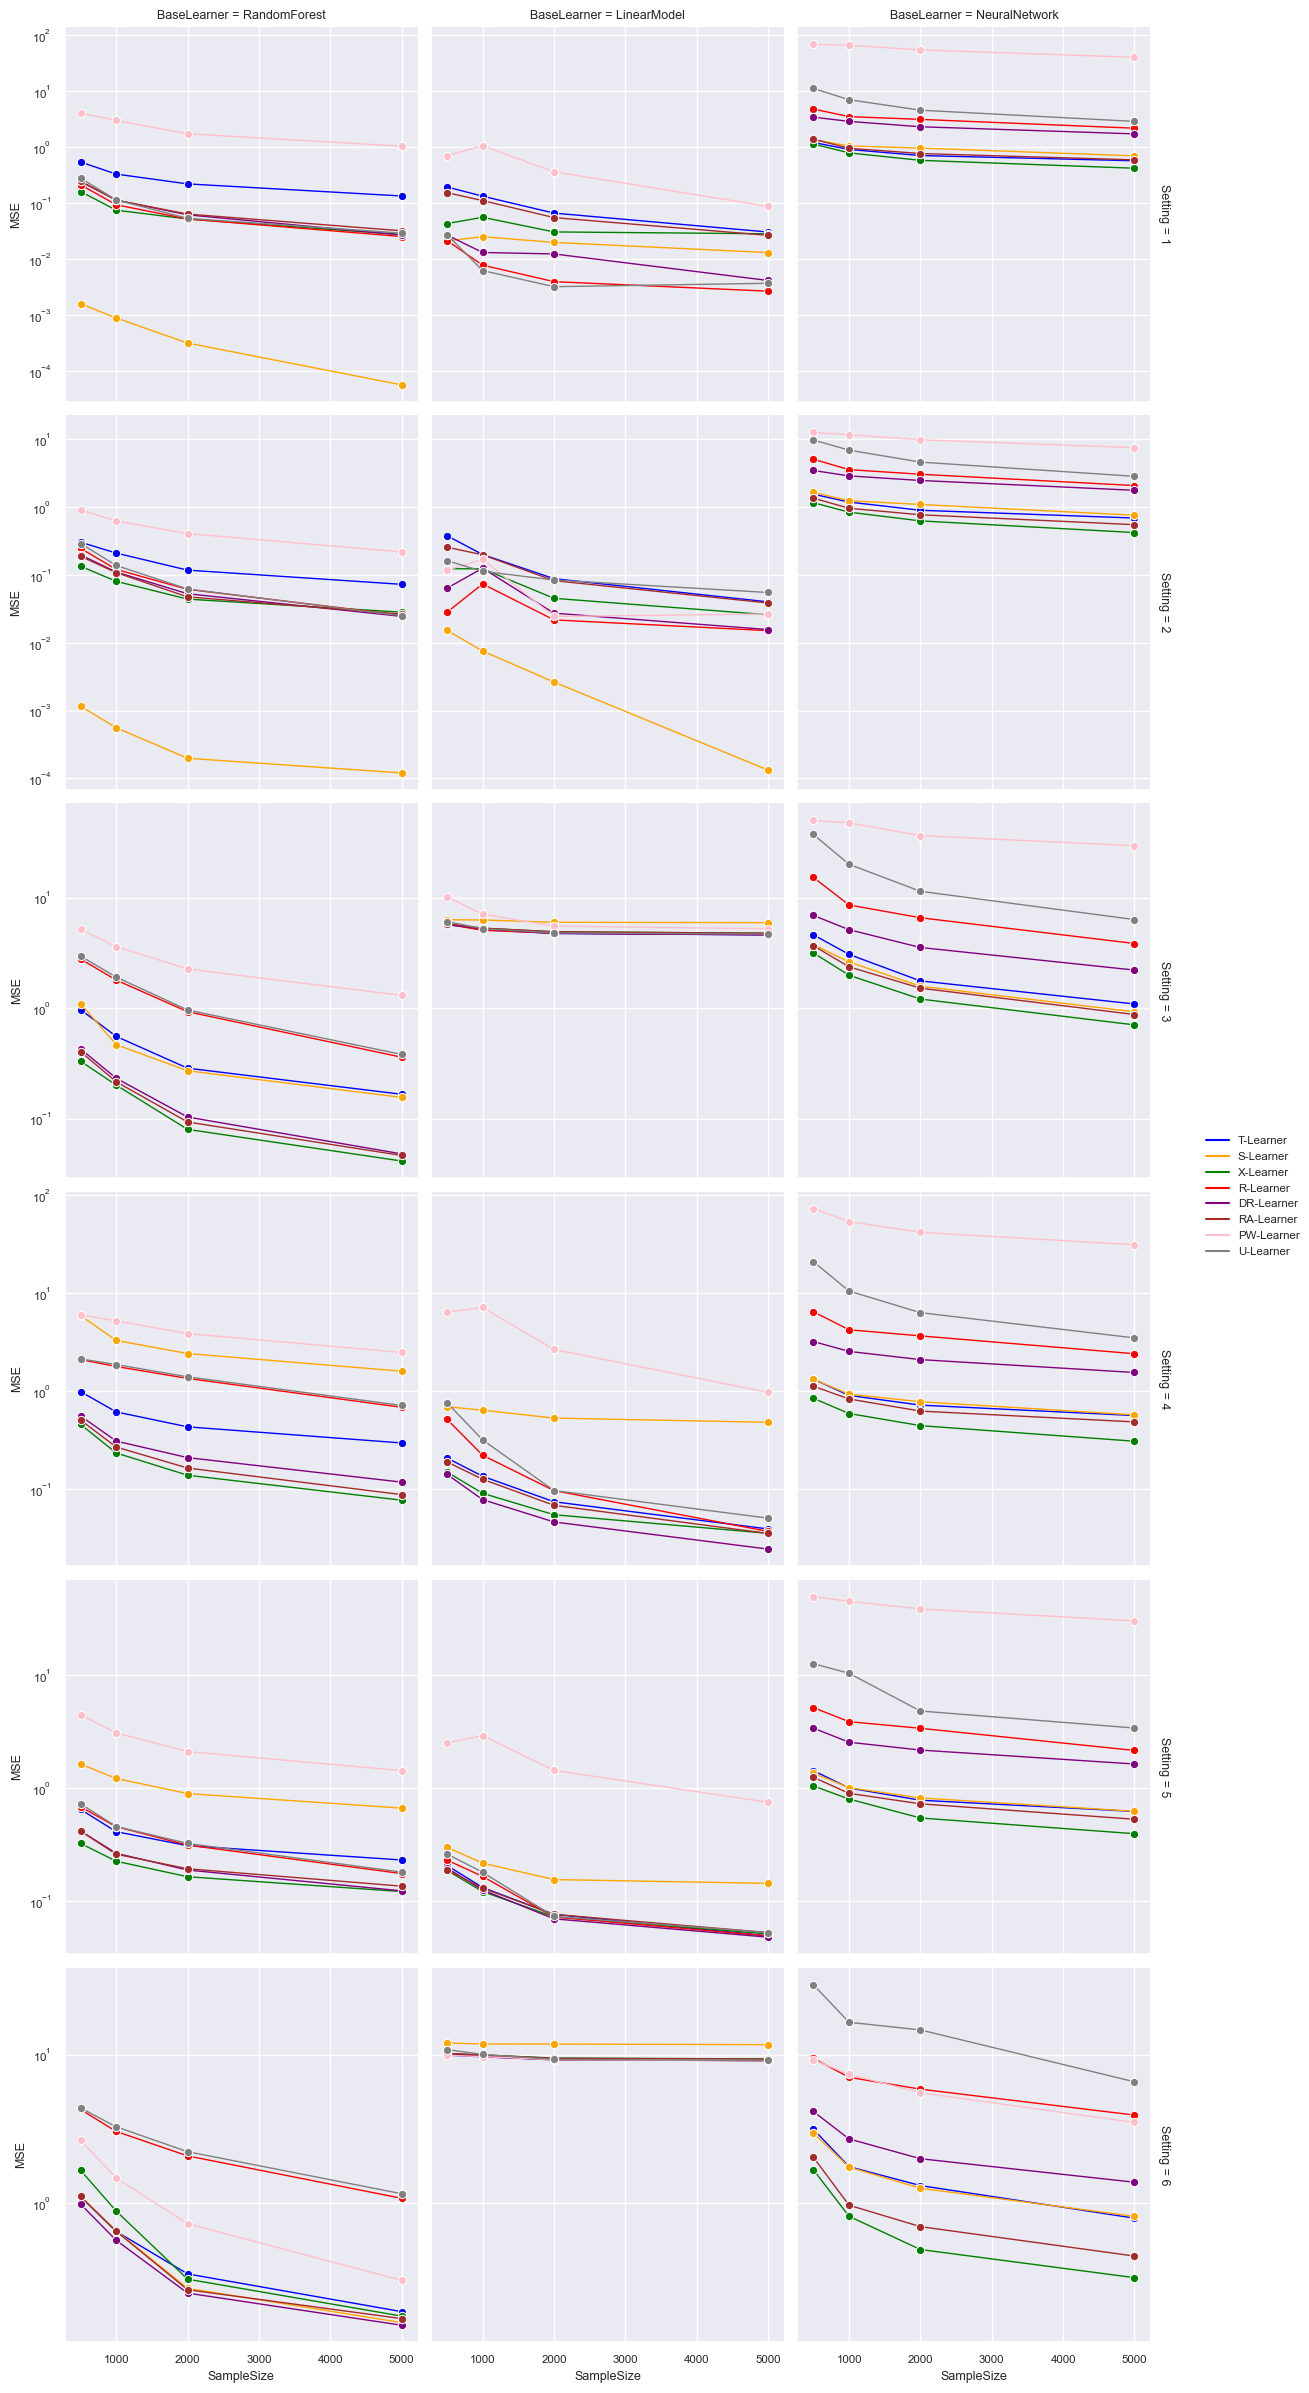

In [14]:
face1 = sns.FacetGrid(data=df_1_6, row='Setting', col='BaseLearner', sharey="row", height=4, aspect=1,
                      margin_titles=True)
face1.map(sns.lineplot, 'SampleSize', 'MSE', 'MetaLearner', errorbar=None, marker='o', estimator="mean", linewidth=1,
          hue_order=col_names, palette=metalearner_colors)
face1.add_legend()
face1.set(yscale='log')

In [ ]:
face1.savefig('setting_1_6_new.eps', format="eps")

Plotting Settings 7-12

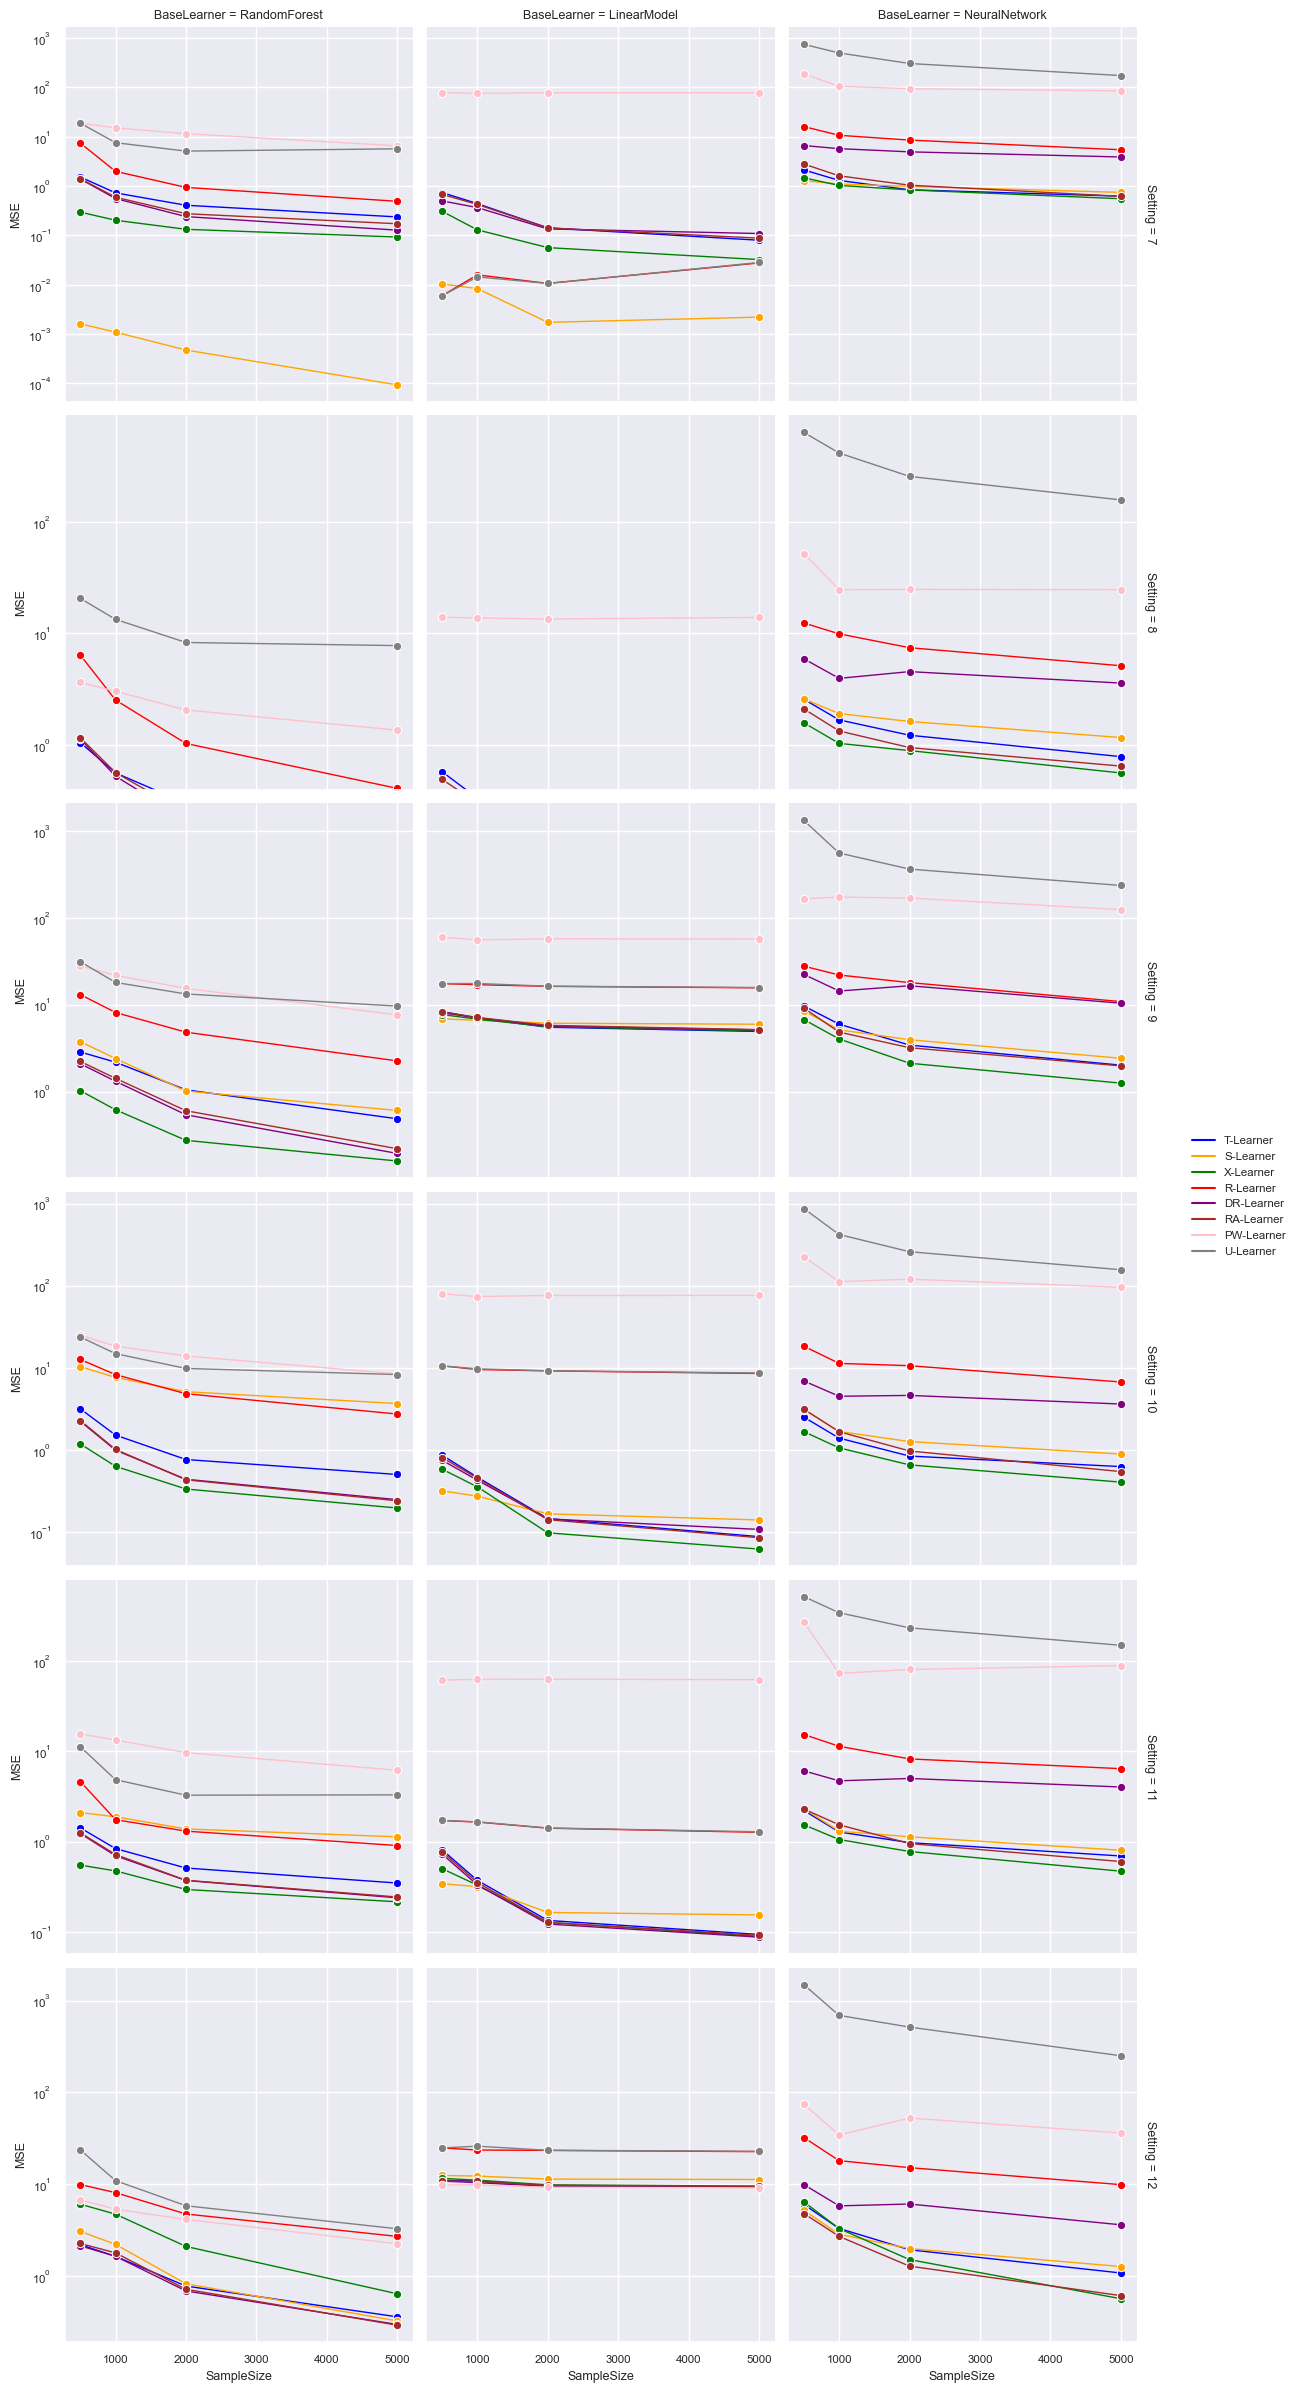

In [15]:
face2 = sns.FacetGrid(data=df_7_12, row='Setting', col='BaseLearner', sharey="row", height=4, aspect=1,
                      margin_titles=True)
face2.map(sns.lineplot, 'SampleSize', 'MSE', 'MetaLearner', errorbar=None, marker='o', estimator="mean", linewidth=1,
          hue_order=col_names, palette=metalearner_colors)
face2.add_legend()
face2.set(yscale='log')  #symlog

In [ ]:
face2.savefig('setting_7_12_new.eps', format="eps")

Plotting Settings 13-18

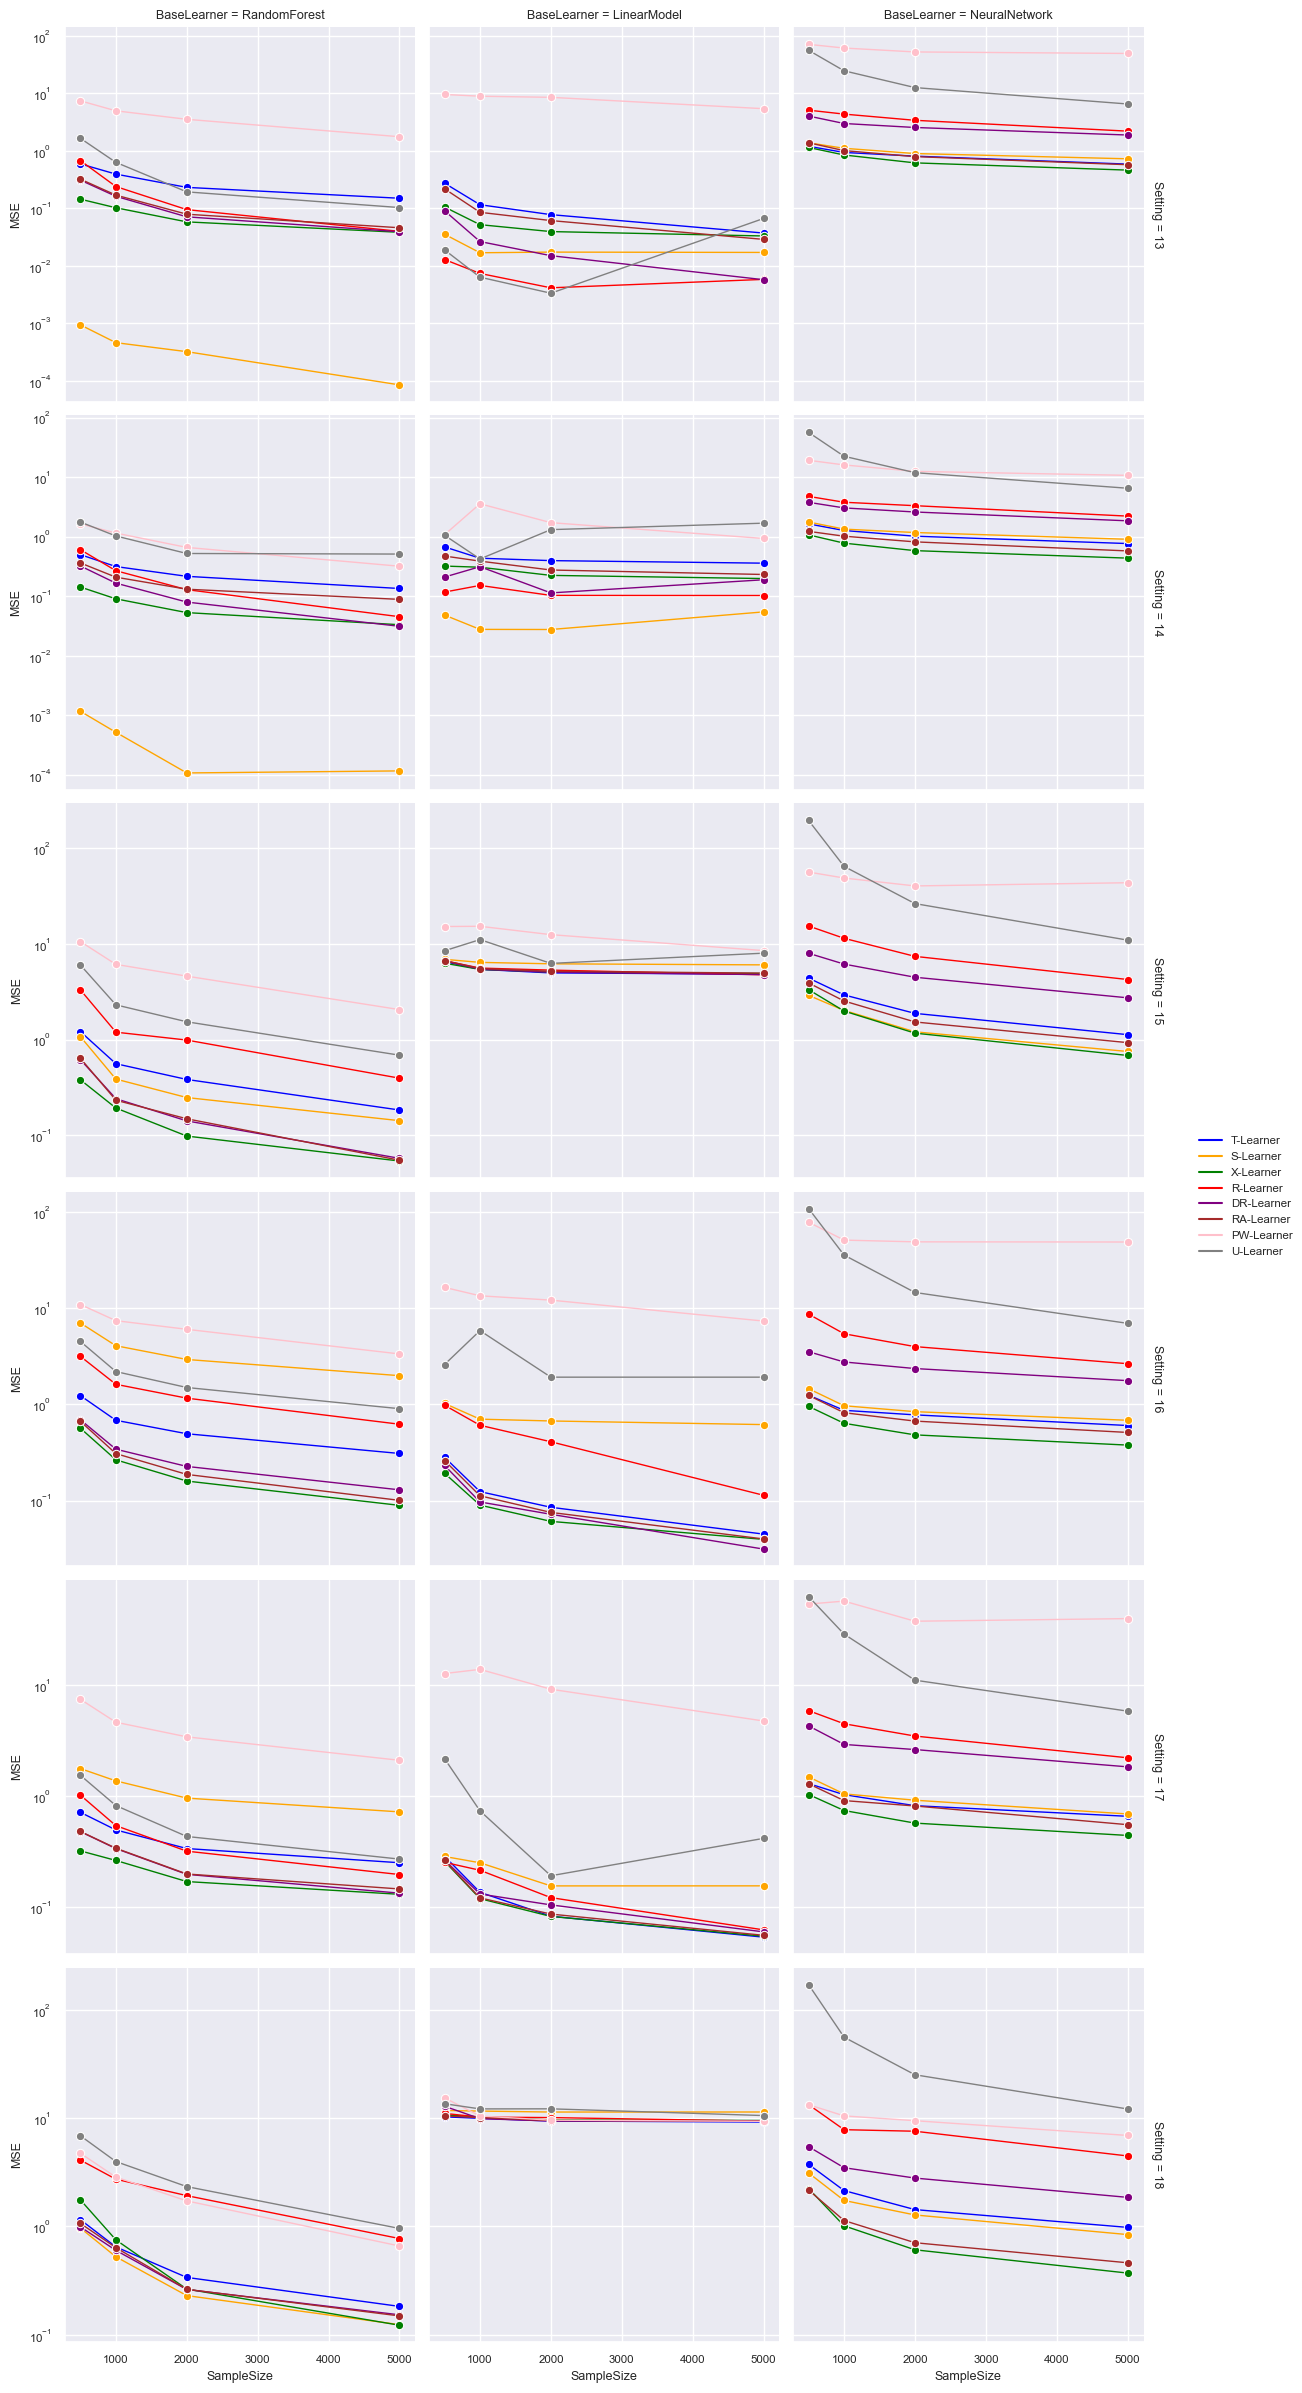

In [16]:
face3 = sns.FacetGrid(data=df_13_18, row='Setting', col='BaseLearner', sharey="row", height=4, aspect=1,
                      margin_titles=True)
face3.map(sns.lineplot, 'SampleSize', 'MSE', 'MetaLearner', errorbar=None, marker='o', estimator="mean", linewidth=1,
          hue_order=col_names, palette=metalearner_colors)
face3.add_legend()
face3.set(yscale='log')

In [ ]:
face3.savefig('setting_13_18_new.eps', format="eps")

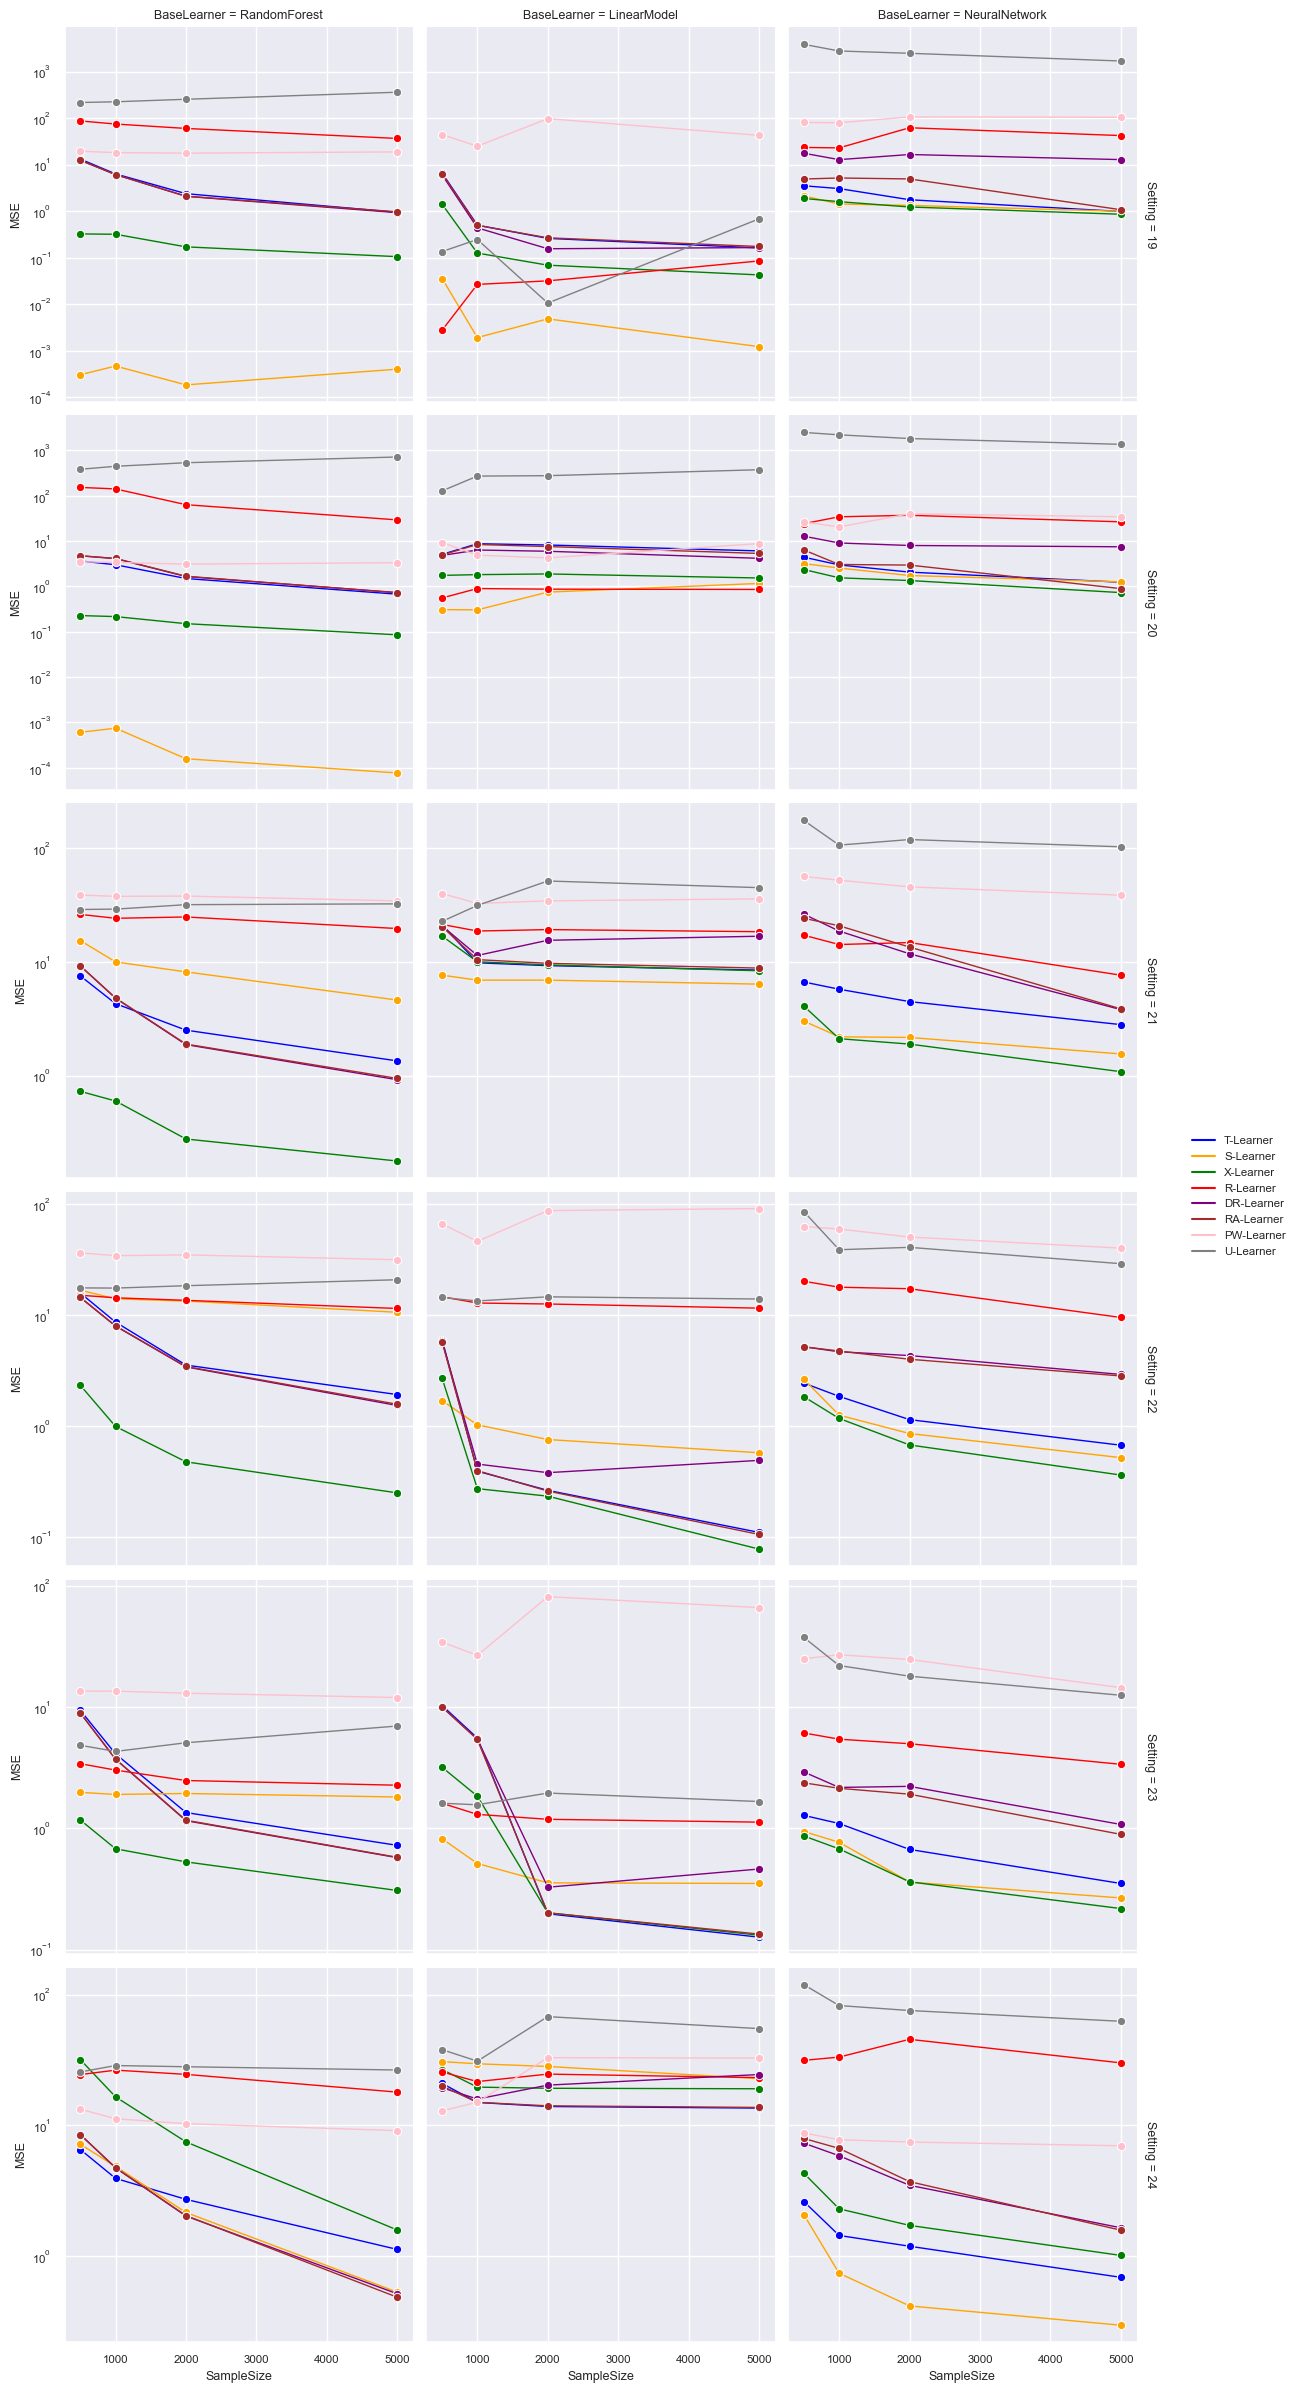

In [17]:
face4 = sns.FacetGrid(data=df_19_24, row='Setting', col='BaseLearner', sharey="row", height=4, aspect=1,
                      margin_titles=True)
face4.map(sns.lineplot, 'SampleSize', 'MSE', 'MetaLearner', errorbar=None, marker='o', estimator="mean", linewidth=1,
          hue_order=col_names, palette=metalearner_colors)
face4.add_legend()
face4.set(yscale='log')

In [ ]:
face4.savefig('setting_19_24_new.eps', format="eps")

ALL SETTINGS BY BASELEARNER

In [ ]:
"""
# concat ALL SETTINGS ALL BASELEARNER
df_1_18 = pd.concat([df_1_6, df_7_12, df_13_18])
"""

In [18]:
# concat ALL SETTINGS ALL BASELEARNER (new)
df_1_24 = pd.concat([df_1_6, df_7_12, df_13_18, df_19_24])

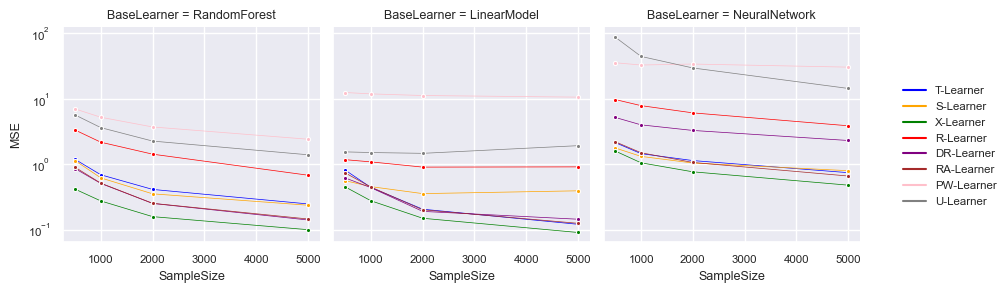

In [19]:
face_all = sns.FacetGrid(data=df_1_24, sharey="row", col='BaseLearner', height=3, aspect=1,
                         margin_titles=True)
face_all.map(sns.lineplot, 'SampleSize', 'MSE', 'MetaLearner', errorbar=None, marker='.', estimator=np.median,
             linewidth=0.5,
             hue_order=col_names, palette=metalearner_colors)
face_all.add_legend()
face_all.set(yscale='log')

In [ ]:
face_all.savefig('all_settings_by_base.eps', format='eps')

In [ ]:
import numpy as np

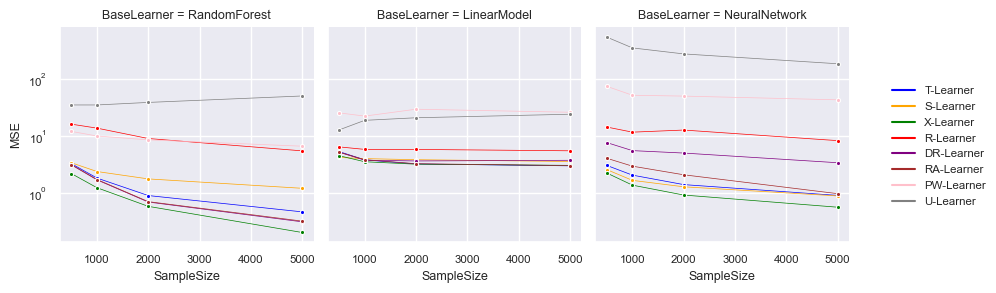

In [20]:
# (new)
face_all = sns.FacetGrid(data=df_1_24, sharey="row", col='BaseLearner', height=3, aspect=1,
                         margin_titles=True)
face_all.map(sns.lineplot, 'SampleSize', 'MSE', 'MetaLearner', errorbar=None, marker='.', estimator=np.mean,
             linewidth=0.5,
             hue_order=col_names, palette=metalearner_colors)
face_all.add_legend()
face_all.set(yscale='log')

ALL SETTINGS ALL BASELEARNER

In [ ]:
face_all = sns.FacetGrid(data=df_1_24, sharey="row", height=3, aspect=1,
                         margin_titles=True)
face_all.map(sns.lineplot, 'SampleSize', 'MSE', 'MetaLearner', errorbar=None, marker='.', estimator="mean",
             linewidth=0.5,
             hue_order=col_names, palette=metalearner_colors)
face_all.add_legend()
face_all.set(yscale='log')

In [ ]:
face_all.savefig('all_settings_.eps', format='eps')

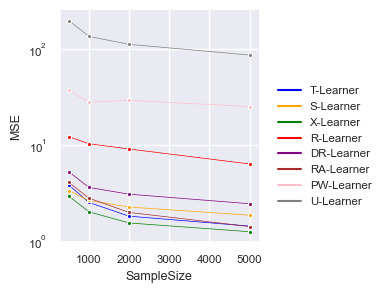

In [23]:
# (new)
face_all = sns.FacetGrid(data=df_1_24, sharey="row", height=3, aspect=1,
                         margin_titles=True)
face_all.map(sns.lineplot, 'SampleSize', 'MSE', 'MetaLearner', errorbar=None, marker='.', estimator=np.mean,
             linewidth=0.5,
             hue_order=col_names, palette=metalearner_colors)
face_all.add_legend()
face_all.set(yscale='log')

IHDP

In [16]:
sns.set_style("darkgrid")

In [6]:
ihdp = open_json("/Users/arberimbibaj/final_results/results_ihdp_100run(s).json")

In [17]:
ihdp = open_json("/Users/arberimbibaj/final_results_replicable_and_curth/results_ihdp_100run(s).json")

In [18]:
ihdp_rf = ihdp[0]
ihdp_lm = ihdp[1]
ihdp_nn = ihdp[2]

In [19]:
ihdp_rf = pd.DataFrame(ihdp_rf)
ihdp_lm = pd.DataFrame(ihdp_lm)
ihdp_nn = pd.DataFrame(ihdp_nn)

In [20]:
"""
column_names = ['T-Learner', 'S-Learner', 'X-Learner', 'R-Learner', 'DR-Learner', 'RA-Learner', 'PW-Learner',
                'U-Learner']
"""
columns = ['T', 'S', 'X', 'R', 'DR', 'RA', 'PW',
           'U']
ihdp_rf.columns = columns
ihdp_lm.columns = columns
ihdp_nn.columns = columns

In [21]:
ihdp_rf = ihdp_rf.melt(var_name='MetaLearner', value_name='MSE')
ihdp_lm = ihdp_lm.melt(var_name='MetaLearner', value_name='MSE')
ihdp_nn = ihdp_nn.melt(var_name='MetaLearner', value_name='MSE')

In [22]:
ihdp_rf['BaseLearner'] = 'RandomForest'
ihdp_lm['BaseLearner'] = 'LinearModel'
ihdp_nn['BaseLearner'] = 'NeuralNetwork'

In [23]:
# concatenate
ihdp_all = pd.concat([ihdp_rf, ihdp_lm, ihdp_nn])

In [24]:
"""
metalearner_colors = {
    'T-Learner': 'blue',
    'S-Learner': 'orange',
    'X-Learner': 'green',
    'R-Learner': 'red',
    'DR-Learner': 'purple',
    'RA-Learner': 'brown',
    'PW-Learner': 'pink',
    'U-Learner': 'gray'
}
"""

"\nmetalearner_colors = {\n    'T-Learner': 'blue',\n    'S-Learner': 'orange',\n    'X-Learner': 'green',\n    'R-Learner': 'red',\n    'DR-Learner': 'purple',\n    'RA-Learner': 'brown',\n    'PW-Learner': 'pink',\n    'U-Learner': 'gray'\n}\n"

In [25]:
metalearner_colors = {
    'T': 'blue',
    'S': 'orange',
    'X': 'green',
    'R': 'red',
    'DR': 'purple',
    'RA': 'brown',
    'PW': 'pink',
    'U': 'gray',
    # Add more MetaLearner-color mappings as needed
}

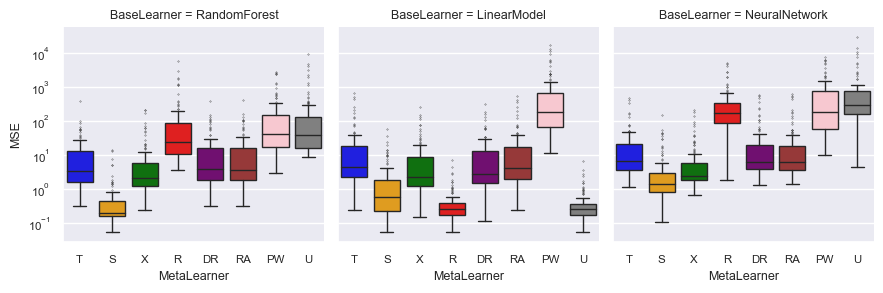

In [15]:
sns.set(font_scale=0.75)
face_ihdp = sns.FacetGrid(data=ihdp_all, col='BaseLearner', sharey=True, height=3, aspect=1,
                          margin_titles=True)
face_ihdp.map(sns.boxplot, 'MetaLearner', 'MSE', orient='v', order=columns, palette=metalearner_colors,
              fliersize=0.5, linewidth=1, flierprops={"marker": "."}, )
face_ihdp.set(yscale='log')

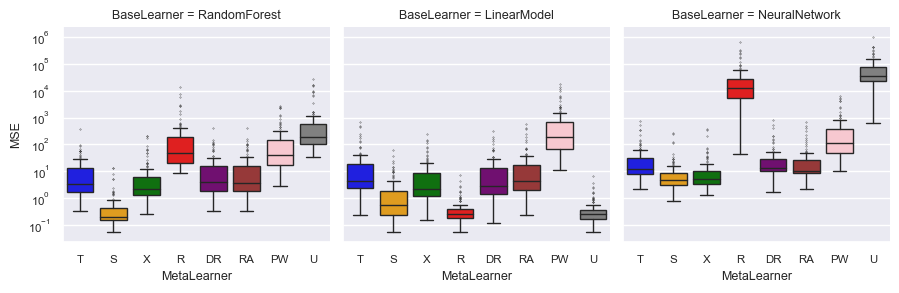

In [26]:
sns.set(font_scale=0.75)
face_ihdp = sns.FacetGrid(data=ihdp_all, col='BaseLearner', sharey=True, height=3, aspect=1,
                          margin_titles=True)
face_ihdp.map(sns.boxplot, 'MetaLearner', 'MSE', orient='v', order=columns, palette=metalearner_colors,
              fliersize=0.5, linewidth=1, flierprops={"marker": "."}, )
face_ihdp.set(yscale='log')

In [ ]:
face_ihdp.savefig('ihdp.eps', format='eps')